# Synthetic Data Vault

Illustration @Eli Wang, USC Viterbi ISE, Jul 2022

© Copyright 2018, MIT Data To AI Lab

## Modeling

Model | Description
----- | -----------
**Copulas** | Models & generates tabular data with classic statistical methods. Uses multivariate copulas.

## Installation
Using `conda`:

In [ ]:
# conda install -c pytorch -c conda-forge sdv

## Demo

### Step 1: Load the data and Configures the meta data

In [7]:
# Load example data
from sdv import load_demo

# Use pre-loaded demo tables
metadata, tables = load_demo(metadata=True)

In [9]:
# Return two objects
# metadata
tables
# metadata.visualize();

{'users':    user_id country gender  age
 0        0      US      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4      US      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os  minutes
 0           0        0  mobile  android       23
 1           1        1  tablet      ios       12
 2           2        1  tablet  android        8
 3           3        2  mobile  android       13
 4           4        4  mobile      ios        9
 5           5        5  mobile  android       32
 6           6        6  mobile      ios        7
 7           7        6  tablet      ios       21
 8           8        6  mobile      ios       29
 9           9        8  tablet      ios       34,
 'transactions':    transaction_id  session_id           timestamp  amount 

### Step 2: Use the SDV API to fit and Save a hierarchical model

In [15]:
from sdv import SDV

# Fit a model using the SDV API
sdv = SDV()
sdv.fit(metadata, tables)

# Sample data from the fitted model
synthetic_data = sdv.sample()
print(synthetic_data)

{'users':    user_id country gender  age
0        0      BG      F   47
1        1      UK      M   37
2        2      ES      M   39
3        3      ES      M   34
4        4      BG    NaN   44
5        5      FR    NaN   57
6        6      FR    NaN   53
7        7      BG    NaN   47
8        8      US      F   35
9        9      BG      M   36, 'sessions':    session_id  user_id  device       os  minutes
0           0        0  mobile      ios       30
1           1        1  mobile  android       19
2           2        2  tablet      ios       24
3           3        3  tablet      ios        9
4           4        4  mobile      ios       24
5           5        4  mobile      ios       33
6           6        5  mobile      ios       13
7           7        5  mobile      ios        7
8           8        8  tablet      ios       13
9           9        8  mobile      ios       34, 'transactions':    transaction_id  session_id           timestamp  amount  cancelled
0          

## Copulas

Copulas is a Python library for modeling multivariate distributions and sampling from them using **copula functions**. Given a table containing numerical data, we can use Copulas to learn the distribution and later on generate new synthetic rows following the same statistical properties.

### Demo

In [64]:
# from copulas.datasets import sample_trivariate_xyz
import copulas.datasets

# data = sample_trivariate_xyz()
data = copulas.datasets.sample_bivariate_age_income(size = 50)
data.head()

,age,income
0,48.935913,398.723821
1,39.234323,371.119699
2,55.659901,410.186793
3,31.810637,364.982601
4,65.342336,415.551931


<AxesSubplot:xlabel='age', ylabel='income'>

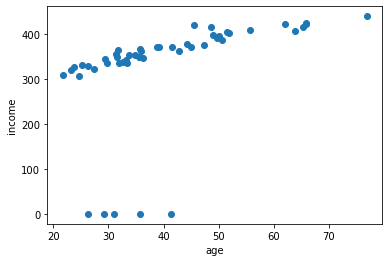

In [65]:
# Visualize this dataset using a 3D scatter plot
from copulas.visualization import scatter_3d, scatter_2d

# scatter_3d(data)
scatter_2d(data)

In [66]:
# Create a Copula instance
from copulas.multivariate import GaussianMultivariate, Multivariate

copula = GaussianMultivariate()
# copula = Multivariate()

In [68]:
# Fit the model
copula.fit(data)

![Model fitting bug, happens from the first run](./images/fit_bug.jpg)

In [70]:
# Sample new data
num_samples = 50

synthetic_data = copula.sample(num_samples)
synthetic_data.head()

,age,income
0,36.746948,359.930127
1,33.114054,370.071022
2,29.275732,438.336607
3,39.106286,470.667511
4,42.261688,362.737131


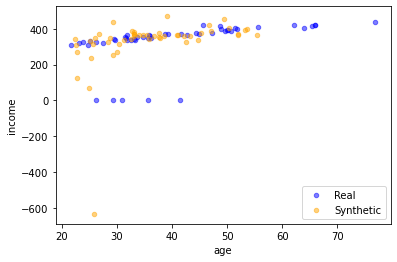

In [71]:
# Compare the synthetic data and the real data.
from copulas.visualization import compare_3d, compare_2d

# compare_3d(data, synthetic_data)
compare_2d(data, synthetic_data)

In [72]:
# Extract and set parameters
copula_params = copula.to_dict()
copula_params.keys()
copula_params
# copula_params['covariance']
# copula_params['univariates']

{'covariance': [[1.0, 0.7613584152244036], [0.7613584152244036, 1.0]],
 'univariates': [{'a': 2.1783715775388446,
   'loc': 20.2558345043082,
   'scale': 9.37823439400427,
   'type': 'copulas.univariate.gamma.GammaUnivariate'},
  {'df': 1.417687660900644,
   'loc': 365.48638193519525,
   'scale': 31.784691622342542,
   'type': 'copulas.univariate.student_t.StudentTUnivariate'}],
 'columns': ['age', 'income'],
 'type': 'copulas.multivariate.gaussian.GaussianMultivariate'}

* a: $\alpha$
* df: degrees of freedom
* loc: location
* scale: scale

In [61]:
# Create an identical Copula instance
new_copula = GaussianMultivariate.from_dict(copula_params)
new_samples = new_copula.sample(num_samples)
new_samples.head()

,age,income
0,38.166947,379.816441
1,42.580791,345.441193
2,58.469168,407.596625
3,26.049526,318.274133
4,41.255722,313.876161
